# Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas.The normal 
process to apply home loan is,customer first apply for home loan after that company validates the customer eligibility for loan and 
based on that company decide either to approve a loan or not.This manual process requires more manpower,also time consuming and 
chances of human error,so the Company wants to automate the loan eligibility process based on customer detail provided while filling online application form so company can focus on those customer only.
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 

In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Importing supervised classification machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing packages to tune the model
from sklearn.model_selection import RandomizedSearchCV

# Importing evalution matrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read Test and Train

train=pd.read_csv("trainloan.csv")
test=pd.read_csv("testloan.csv")

In [4]:
# shape of the dataset

train_shape=train.shape
print("shape of the train data:",train_shape)

test_shape=test.shape
print("shape of the train data:",test_shape)

shape of the train data: (614, 13)
shape of the train data: (367, 12)


In [5]:
# Features in the dataset

print("fetures present in the train dataset: \n",train.columns)
print()
print("fetures present in the test dataset: \n",test.columns)

fetures present in the train dataset: 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

fetures present in the test dataset: 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [6]:
# can drop the loan_ID from both train and test data

train.drop("Loan_ID",axis=1,inplace=True)
test.drop("Loan_ID",axis=1,inplace=True)

In [7]:
# Features in the dataset

print("fetures present in the train dataset: \n",train.columns)
print()
print("fetures present in the test dataset: \n",test.columns)

fetures present in the train dataset: 
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

fetures present in the test dataset: 
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [8]:
# Print data types for each variable

train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,6756.756757,0,33.783784,60.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076.000000,1500,126.000000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000.000000,1800,208.000000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340.000000,2546,100.000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276.000000,0,78.000000,360.0,1.0,Urban


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
train.describe(include=["object"])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [14]:
# analysing the percentage of loan approval and deny records

train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

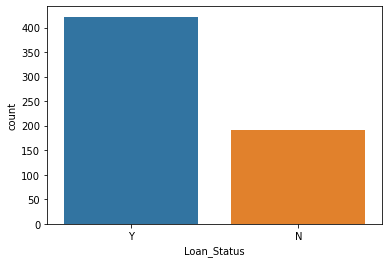

In [16]:
sns.countplot(train["Loan_Status"])

around 69% loan applications were approved

# Univariate analysis of categorical features

<AxesSubplot:title={'center':'Education'}>

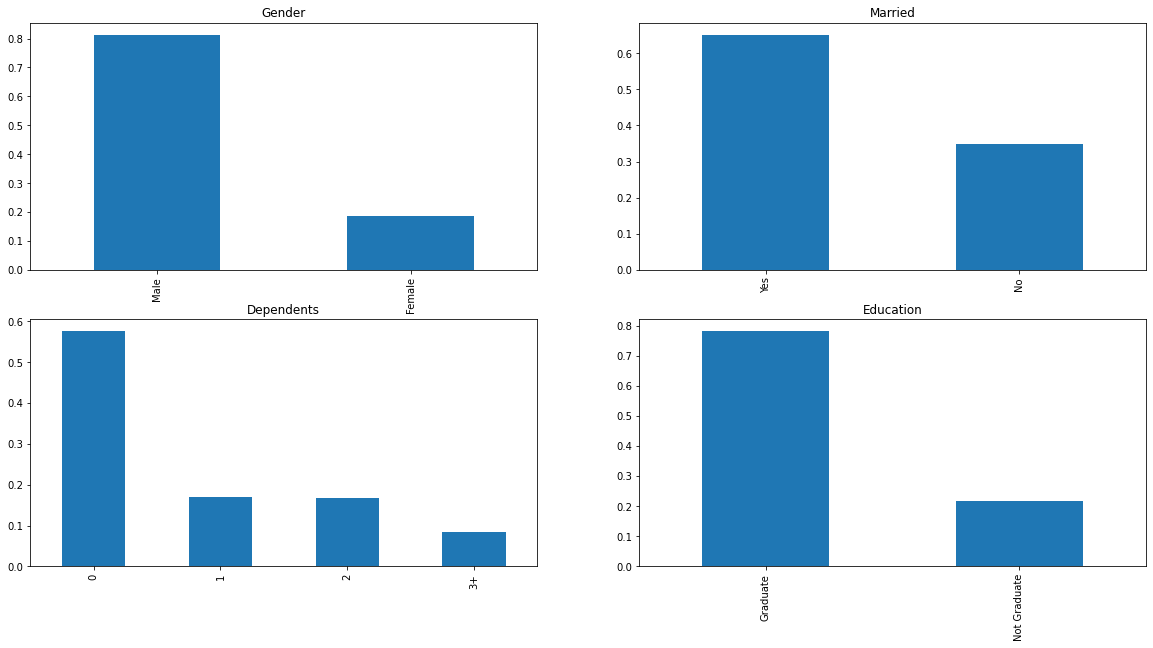

In [17]:
plt.subplot(221)
train["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")

plt.subplot(222)
train["Married"].value_counts(normalize=True).plot.bar(title="Married")

plt.subplot(223)
train["Dependents"].value_counts(normalize=True).plot.bar(title="Dependents")

plt.subplot(224)
train["Education"].value_counts(normalize=True).plot.bar(title="Education")



around 80% applicant are male

around 65% are married

most of the applicants didn't have any dependents

around 77% applicants are graduate

<AxesSubplot:title={'center':'Credit_History'}>

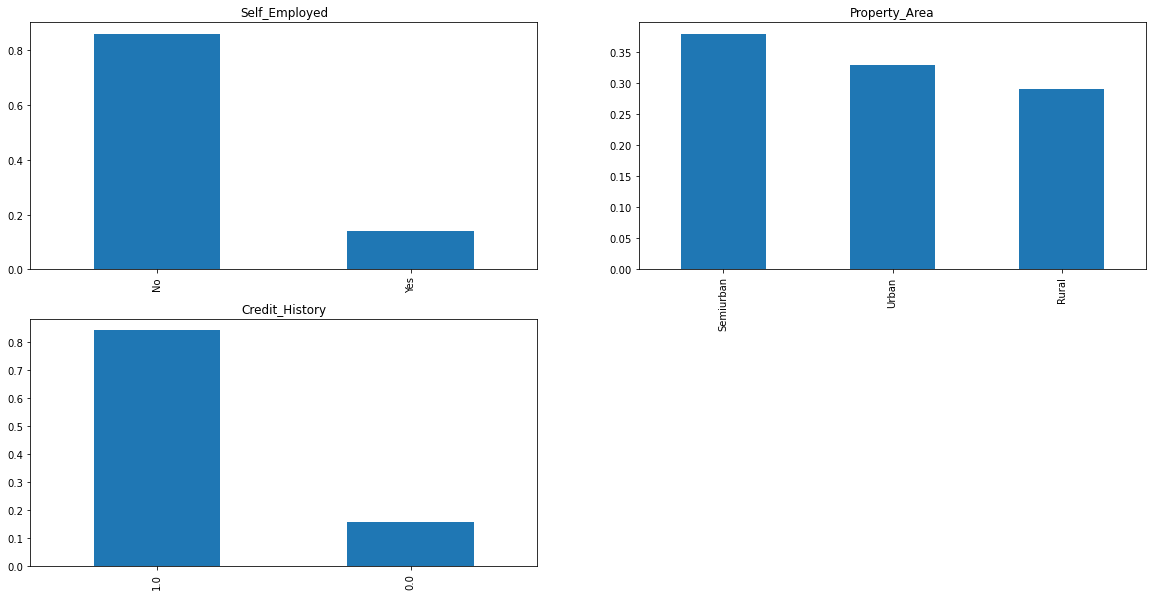

In [18]:
plt.subplot(221)
train["Self_Employed"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Self_Employed")

plt.subplot(222)
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

plt.subplot(223)
train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History")

around 15% of applicants are self employed

most of the applicant reside in Semiurban area

around 85% applicant repaid their loan on time

# Univariate analysis of numerical features

<AxesSubplot:>

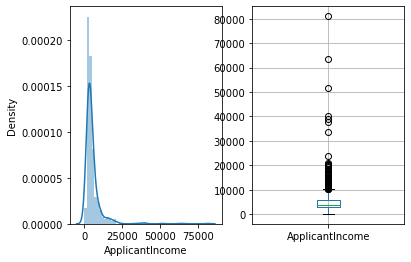

In [19]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train[["ApplicantIncome"]].boxplot(figsize=(16,5))


we can see the distribution of applicant income is right skewed and it has lots of outliers

<AxesSubplot:>

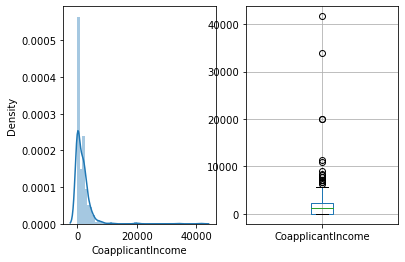

In [20]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train[["CoapplicantIncome"]].boxplot(figsize=(16,5))

we observe similar distribution with coapplicant income

<AxesSubplot:>

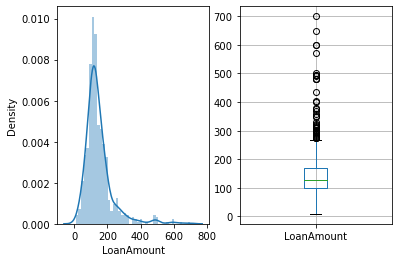

In [56]:
plt.subplot(121)
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train[["LoanAmount"]].boxplot(figsize=(16,5))

loan amount distribution is fairly normal but still has lot of outliers which needs to be treated

# Data Preprocessing

In [21]:
# checking the duplicate records

train.duplicated().sum()

0

In [22]:
train[train.duplicated()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [23]:
# checking the missing values present in train data

train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
# replacing the missing values for train data
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [25]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
# checking the missing values present in test data

test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [27]:
# Similar changes in test file
    
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [28]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

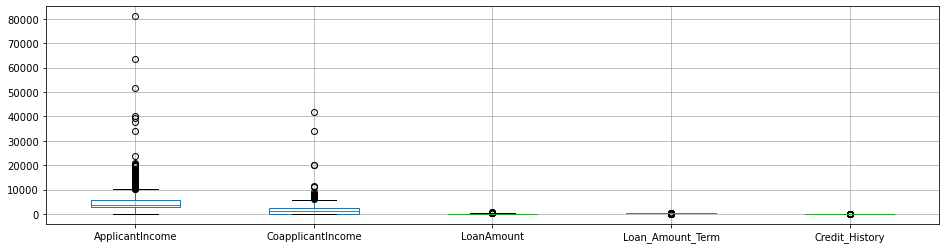

In [29]:
# checking the outliers

train.boxplot(figsize=(16,4))

In [30]:
# handling the outliers by log transformation

train["LoanAmount"]=np.log(train["LoanAmount"])

test["LoanAmount"]=np.log(test["LoanAmount"])

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

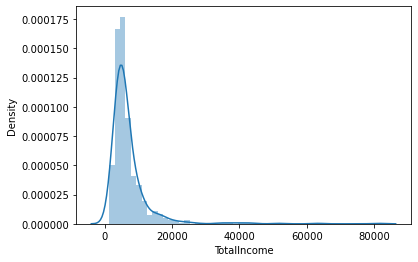

In [31]:
# Feature Engineering : Total Income

train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

sns.distplot(train["TotalIncome"])

<AxesSubplot:>

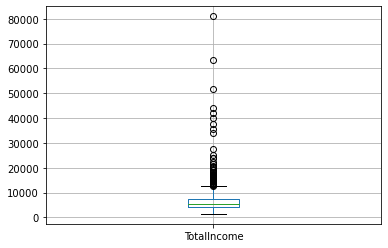

In [32]:
train[["TotalIncome"]].boxplot()

In [33]:
# Removing skewness in TotalIncome variable by IQR 

q1=train["TotalIncome"].quantile(0.75)
q2=train["TotalIncome"].quantile(0.25)

iqr=q1-q2

upper_tail= q1 + (1*iqr)
print(upper_tail)

train["TotalIncome"].loc[train["TotalIncome"]>upper_tail]=train["TotalIncome"].median()

10877.5


<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

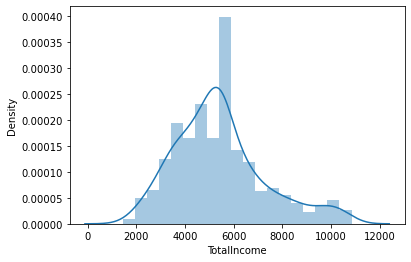

In [34]:
sns.distplot(train["TotalIncome"])

<AxesSubplot:>

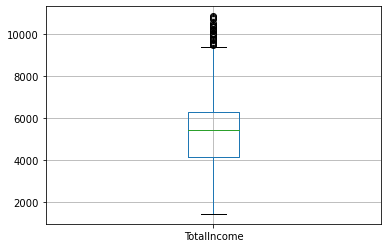

In [35]:
train[["TotalIncome"]].boxplot()

In [36]:
q1=test["TotalIncome"].quantile(0.75)
q2=test["TotalIncome"].quantile(0.25)

iqr=q1-q2

upper_tail= q1 + (1*iqr)
print(upper_tail)

test["TotalIncome"].loc[test["TotalIncome"]>upper_tail]=test["TotalIncome"].median()

9804.0


<AxesSubplot:>

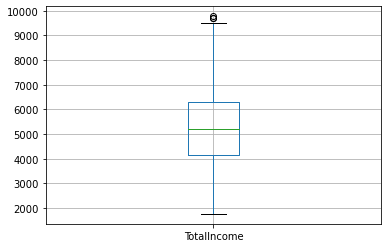

In [37]:
test[["TotalIncome"]].boxplot()

In [38]:
# feature engineering : EMI

train['EMI']=(train['LoanAmount']/train['Loan_Amount_Term'])*1000
test['EMI']=(test['LoanAmount']/test['Loan_Amount_Term'])*1000

<AxesSubplot:xlabel='EMI', ylabel='Density'>

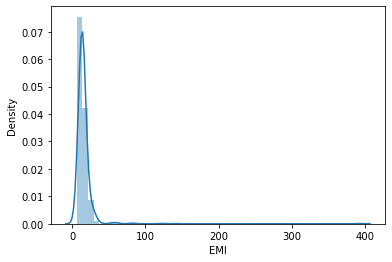

In [39]:
sns.distplot(train['EMI'])

In [40]:
# Balance Income feature
train['BalanceIncome']=train['TotalIncome']-(train['EMI']) 
test['BalanceIncome']=test['TotalIncome']-(test['EMI'])

<AxesSubplot:xlabel='BalanceIncome', ylabel='Density'>

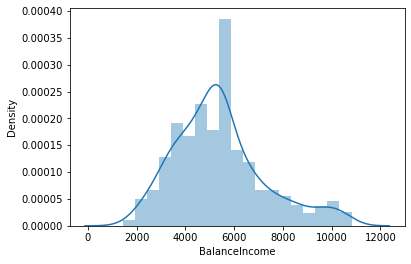

In [41]:
sns.distplot(train['BalanceIncome'])

# Encoding Techniques

In [42]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
TotalIncome          float64
EMI                  float64
BalanceIncome        float64
dtype: object

In [43]:
train["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [44]:
train["Gender"].replace({"Male":0,"Female":1},inplace=True)
test["Gender"].replace({"Male":0,"Female":1},inplace=True)

In [45]:
train["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
train["Married"].replace({"No":0,"Yes":1},inplace=True)
test["Married"].replace({"No":0,"Yes":1},inplace=True)

In [47]:
train["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [48]:
train["Dependents"].replace({"0":0,"1":1,"2":2,"3+":3},inplace=True)
test["Dependents"].replace({"0":0,"1":1,"2":2,"3+":3},inplace=True)

In [49]:
train["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [50]:
train["Education"].replace({"Graduate":0,"Not Graduate":1},inplace=True)
test["Education"].replace({"Graduate":0,"Not Graduate":1},inplace=True)

In [51]:
train["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [52]:
train["Self_Employed"].replace({"No":0,"Yes":1},inplace=True)
test["Self_Employed"].replace({"No":0,"Yes":1},inplace=True)

In [53]:
train["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [54]:
train["Property_Area"].replace({"Urban":0,"Rural":1,"Semiurban":2},inplace=True)
test["Property_Area"].replace({"Urban":0,"Rural":1,"Semiurban":2},inplace=True)

In [55]:
train["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [56]:
train["Loan_Status"].replace({"Y":0,"N":1},inplace=True)

In [57]:
# all categorical feature converted into numerical value
train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
TotalIncome          float64
EMI                  float64
BalanceIncome        float64
dtype: object

# Data Balancing

In [58]:
train["Loan_Status"].value_counts()

0    422
1    192
Name: Loan_Status, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
x=train.drop("Loan_Status",axis=1)
y=train["Loan_Status"]

smt=SMOTE()
x_sample,y_sample=smt.fit_resample(x,y)

In [61]:
y_sample.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

# Model Building

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=42)

In [63]:
# Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [64]:
LR_predict=LR.predict(x_test)

LR_accuracy=accuracy_score(y_test,LR_predict)
LR_accuracy*100

69.23076923076923

In [65]:
# KNN

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [66]:
KNN_predict=KNN.predict(x_test)
KNN_accuracy=accuracy_score(y_test,KNN_predict)
KNN_accuracy*100

64.49704142011834

In [67]:
# Decision tree

DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
DT_predict=DT.predict(x_test)

DT_accuracy=accuracy_score(y_test,DT_predict)
DT_accuracy*100

74.55621301775149

In [69]:
# Random Forest

RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
RF_predict=RF.predict(x_test)

RF_accuracy=accuracy_score(y_test,RF_predict)
RF_accuracy*100

80.4733727810651

In [71]:
# XGboost

from xgboost import XGBClassifier

XG=XGBClassifier()
XG.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
XG_predict=XG.predict(x_test)

XG_accuracy=accuracy_score(y_test,XG_predict)
XG_accuracy*100

82.24852071005917

Out of all machine learning algorithms Random Forest and Xgboost machine learning algorithms giving highest accuracy.
Lets try hyperparameter tunning to improve the accuracy.

In [82]:
# hyperparameter tunning for RF

RF_2=RandomForestClassifier()

RF_hyper={"n_estimators":np.arange(10,50),
          "max_depth":np.arange(5,50),
          "min_samples_split":np.arange(2,20),
          "min_samples_leaf":np.arange(1,10),    
          "criterion":["entropy","gini"]
    
}

RF_cv=RandomizedSearchCV(RF_2,RF_hyper,cv=10)
RF_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])})

In [83]:
# best hyperparameter

RF_cv.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 34,
 'criterion': 'entropy'}

In [84]:
RF=RandomForestClassifier(n_estimators=30,min_samples_split=2,min_samples_leaf=2,max_depth=34,criterion="entropy")
RF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=34, min_samples_leaf=2,
                       n_estimators=30)

In [85]:
RF_cv_predict=RF.predict(x_test)

RF_accuracy=accuracy_score(y_test,RF_cv_predict)
RF_accuracy*100

83.4319526627219

Accuracy improved after hyperparameter tunning

# Therefore predicting the target variable of test data using RF

In [86]:
pred_test=RF.predict(test)

In [87]:
df_test=pd.DataFrame(pred_test)

In [88]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,EMI,BalanceIncome
0,0,1,0,0,0,6756.756757,0,3.519981,60.0,1.0,0,6756.756757,58.666349,6698.090408
1,0,1,1,0,0,3076.000000,1500,4.836282,360.0,1.0,0,4576.000000,13.434116,4562.565884
2,0,1,2,0,0,5000.000000,1800,5.337538,360.0,1.0,0,6800.000000,14.826495,6785.173505
3,0,1,2,0,0,2340.000000,2546,4.605170,360.0,1.0,0,4886.000000,12.792139,4873.207861
4,0,0,0,1,0,3276.000000,0,4.356709,360.0,1.0,0,3276.000000,12.101969,3263.898031


In [89]:
df_test.head()

,0
0,0
1,0
2,0
3,0
4,1


In [90]:
test["Loan_status"]=pred_test

In [91]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,EMI,BalanceIncome,Loan_status
0,0,1,0,0,0,6756.756757,0,3.519981,60.0,1.0,0,6756.756757,58.666349,6698.090408,0
1,0,1,1,0,0,3076.000000,1500,4.836282,360.0,1.0,0,4576.000000,13.434116,4562.565884,0
2,0,1,2,0,0,5000.000000,1800,5.337538,360.0,1.0,0,6800.000000,14.826495,6785.173505,0
3,0,1,2,0,0,2340.000000,2546,4.605170,360.0,1.0,0,4886.000000,12.792139,4873.207861,0
4,0,0,0,1,0,3276.000000,0,4.356709,360.0,1.0,0,3276.000000,12.101969,3263.898031,1
